In [9]:
import torch
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from matplotlib import pyplot as plt
import numpy as np


train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=False)
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [4]:
batch_size = 100
n_iters = 3000
epochs = n_iters / (len(train_dataset) / batch_size)
input_dim = 784
output_dim = 10
lr_rate = 0.001

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = self.linear(x)
        return outputs

In [7]:
model = LogisticRegression(input_dim, output_dim)
criterion = torch.nn.CrossEntropyLoss() # computes softmax and then the cross entropy
optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)

In [8]:
iter = 0
record=[]
for epoch in range(int(epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if iter%50==0:
            record.append(loss.item())
        iter+=1
        if iter%500==0:
            # calculate Accuracy
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = Variable(images.view(-1, 28*28))
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total+= labels.size(0)
                # for gpu, bring the predicted and labels back to cpu fro python operations to work
                correct+= (predicted == labels).sum()
            accuracy = 100 * correct/total
            print("Iteration: {}. Loss: {}. Accuracy: {}.".format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.8649336099624634. Accuracy: 70.
Iteration: 1000. Loss: 1.597383737564087. Accuracy: 78.
Iteration: 1500. Loss: 1.377957820892334. Accuracy: 80.
Iteration: 2000. Loss: 1.0834832191467285. Accuracy: 81.
Iteration: 2500. Loss: 1.1656370162963867. Accuracy: 82.
Iteration: 3000. Loss: 0.9828572869300842. Accuracy: 83.


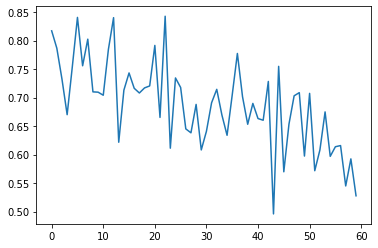

In [33]:
plt.plot(np.array(record))

In [58]:
train_loader.numpy()

AttributeError: 'DataLoader' object has no attribute 'numpy'

In [30]:
np.array([1,2])-np.array([1,2])

array([0, 0])

In [40]:
a=True
b=None
for i in train_loader:
    if a:
        b=i
        a=False

In [80]:
len(b[0][0])

1

In [73]:
len(outputs[0])

10